# U.S. Airline Twitter Sentiment Analysis

Marlene Aviles

680: Project 2

In [5]:
conda install -c anaconda scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/marleneaviles/opt/anaconda3/envs/NewPython

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h1de35cc_0         3.4 MB  anaconda
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> anaconda::ca-certificates-2020.6.24-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.6.20-py37hc~ --> anaconda::certifi-2020.6.20-py37_0
  openssl            conda-forge::openssl-1.1.1g-h0b31af3_0 --> anaconda::openssl-1.1.1g-h1de35cc_0



openssl-1.1.1g       | 3.4 MB    | ############################

In [6]:
conda install -c conda-forge wordcloud

Solving environment: done

## Package Plan ##

  environment location: /Users/marleneaviles/opt/anaconda3/envs/NewPython

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lcms2-2.11                 |       h92f6f08_0         278 KB
    olefile-0.46               |             py_0          31 KB  conda-forge
    pillow-7.2.0               |   py37ha54b6ba_0         581 KB
    tk-8.6.10                  |       hbbe82c9_0         3.3 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  lcms2              pkgs/main/osx-64::lcms2-2.11-h92f6f08_0
  olefile            conda-forge/noarch::olefile-0.46-py_0
  pillow             pkgs/main/osx-64::pillow-7.2.0-py37ha54b6ba_0
  wordcloud          conda-forge/osx-64:

In [66]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [3]:
Tweet = pd.read_csv("Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
Tweet.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


# Data Prepartion 

In [5]:
# dropping columns not desired
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [6]:
count_mood =Tweet['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'The total count of sentiment')

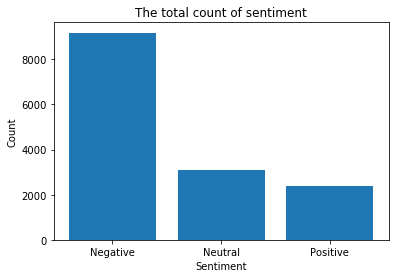

In [7]:
Index = [1,2,3]
plt.bar(Index,count_mood)
plt.xticks(Index,['Negative','Neutral','Positive'])
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('The total count of sentiment')

In [16]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

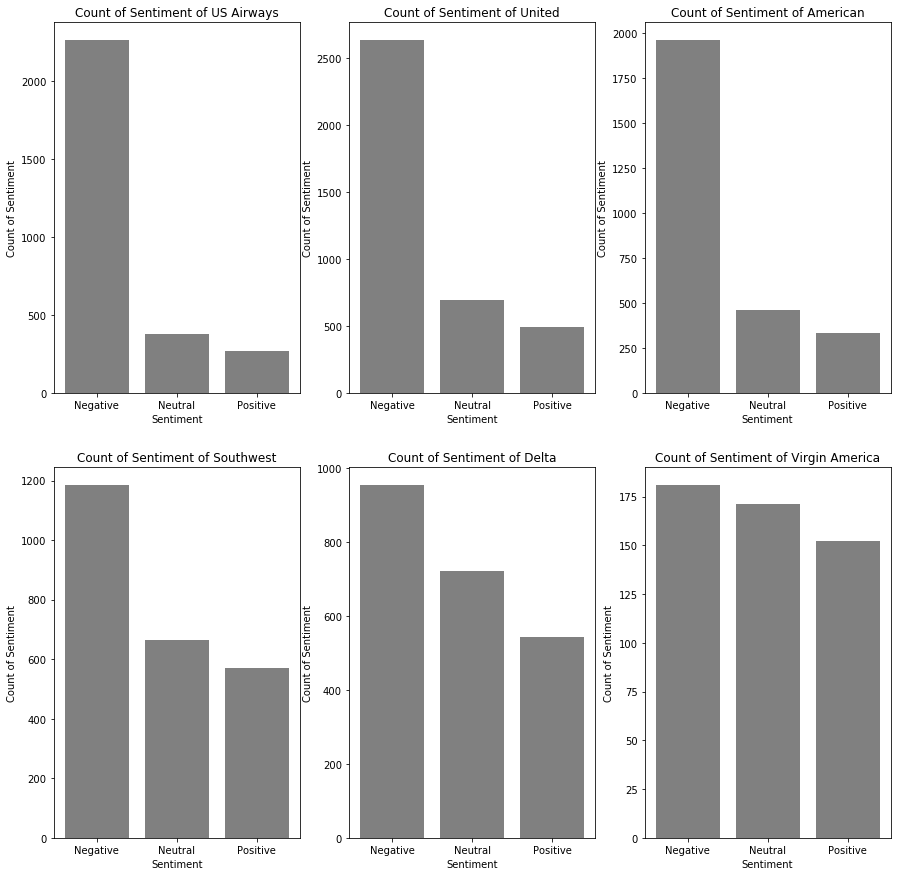

In [95]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color ="gray")
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.ylabel('Count of Sentiment')
    plt.xlabel('Sentiment')
    plt.title('Count of Sentiment of '+Airline)
plt.figure(1,figsize=(15, 15))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

The skew of the first three airlines more towards negative mood, US Airways, United, and American.
The last three airlines are more evenly distributed, Southwest, Delta, and Virgin America. 

In [56]:
Tweet.isnull() 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,False,False,True,False
2,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,False,False,False,False,True,True
14636,False,False,False,False,False,False,False,False,False,False,False,True
14637,False,False,False,True,True,False,False,False,False,False,False,True
14638,False,False,False,False,False,False,False,False,False,False,False,False


# Visualizing Words

In [30]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [31]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

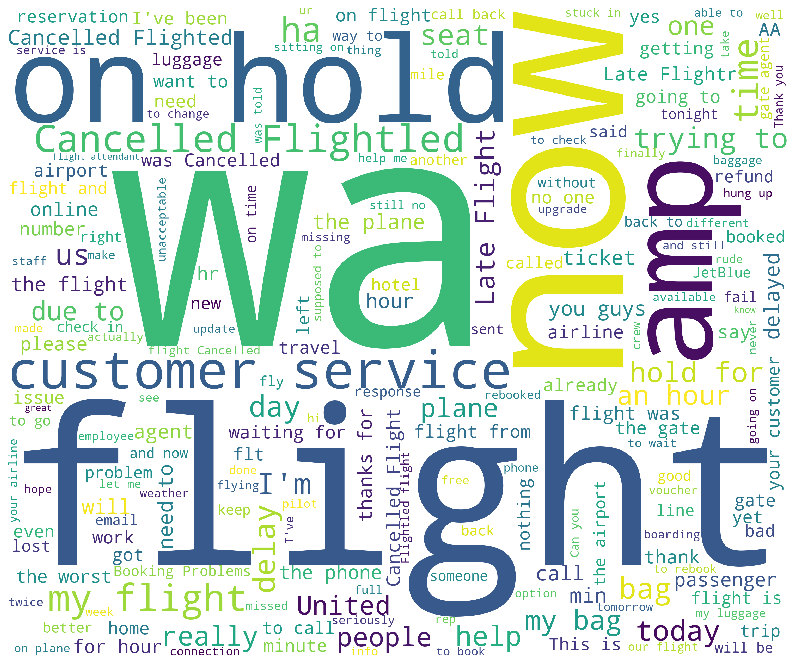

In [11]:
plt.figure(1,figsize=(14, 14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The words such as cancelled flight, on hold, flight, late flight, seem to commonly appear in the data. 

## Analyzing Negative Reasons 

In [32]:
neg_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [38]:
def neg_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [46]:
def neg_reason(Airline):
    df=neg_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=60)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Negative Reasons for '+Airline)

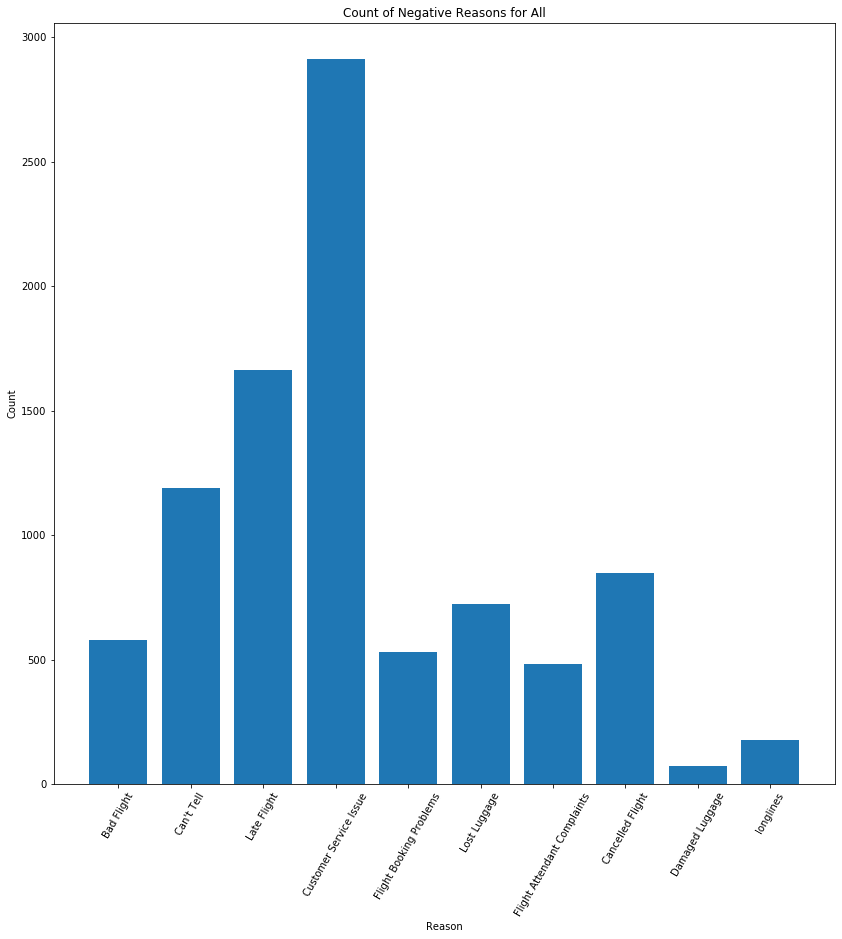

In [48]:
plt.figure(1,figsize=(14, 14))
neg_reason('All')


Visualization shows feedback given by customers for all of the airlines combined.

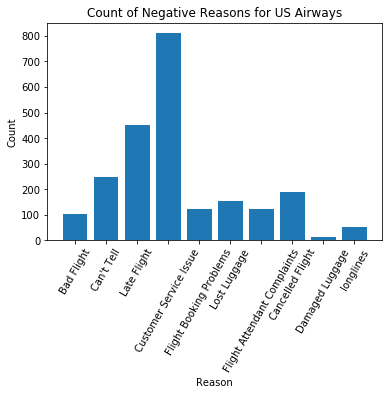

In [49]:
# Analyzing Airline individually
neg_reason('US Airways')

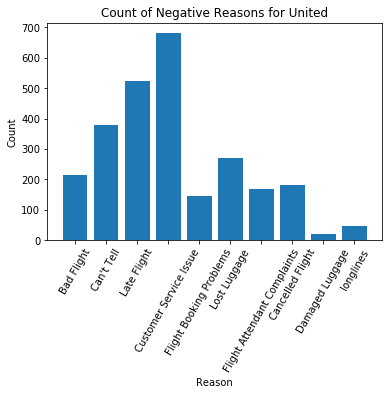

In [50]:
neg_reason('United')

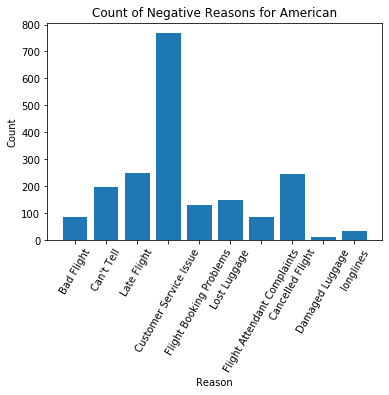

In [52]:
neg_reason('American')

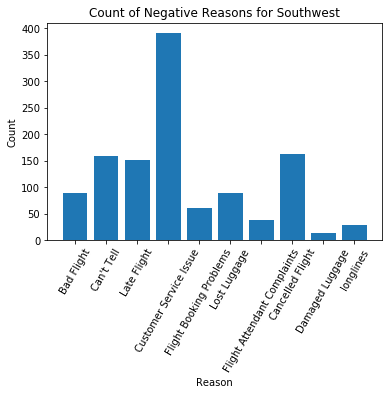

In [53]:
neg_reason('Southwest')

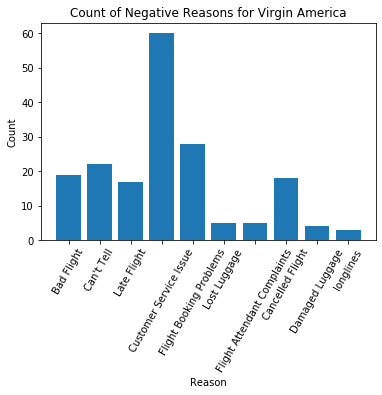

In [54]:
neg_reason('Virgin America')

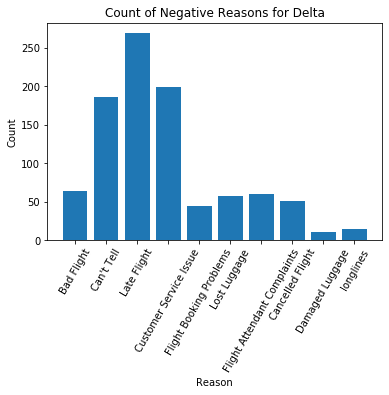

In [97]:
neg_reason('Delta')

## Data Pre-processing

In [82]:
# preparing data for classification models with nltk and stopwords
def tweet_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [78]:
def clean_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [79]:
# applying functions to tweet to remove stop words and cleaninig tweet

Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [80]:
# appending tweets 
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [81]:
# feature_extraction.text with CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [87]:
# creating classifier function 
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=150),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=150),
    AdaBoostClassifier()]

In [88]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of DecisionTreeClassifieris 0.7527322404371585
Accuracy of RandomForestClassifieris 0.8090846994535519
Accuracy of AdaBoostClassifieris 0.7855191256830601


In [85]:
# Comparing Classifier Performance 

Text(0.5, 1.0, 'Accuracies of Classifiers')

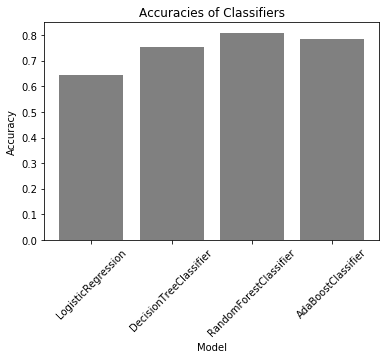

In [96]:
Index = [1,2,3,4,]
plt.bar(Index,Accuracy, color ="gray")
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Classifiers')

Random Forest was the most accurate, followed by AdaBoost, Decision Tree, and Logistic Regression. 